In [ ]:
!pip install ijson

     |████████████████████████████████| 126 kB 37.3 MB/s 


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
import pandas as pd
import ijson
import seaborn as sns

In [ ]:
file = open("sample1.txt","w") 
#subsetting the dataset
data = ijson.parse(open('all-traffic.json', 'r'))
imp= ['hits.hits.item._source.@timestamp','hits.hits.item._source.flow.ip_protocol','hits.hits.item._source.flow.packets','hits.hits.item._source.flow.dst_addr','hits.hits.item._source.flow.client_asn','hits.hits.item._source.flow.client_addr', 'hits.hits.item._source.flow.output_ifname', 'hits.hits.item._source.flow.server_country', 'hits.hits.item._source.flow.server_geo_location', 'hits.hits.item._source.flow.server_autonomous_system', 'hits.hits.item._source.flow.dst_port_name', 'hits.hits.item._source.flow.tos', 'hits.hits.item._source.flow.dst_mask_len', 'hits.hits.item._source.flow.src_port_name', 'hits.hits.item._source.flow.src_country_code', 'hits.hits.item._source.flow.dst_country_code', 'hits.hits.item._source.flow.dst_asn', 'hits.hits.item._source.flow.src_country', 'hits.hits.item._source.flow.src_hostname', 'hits.hits.item._source.flow.dst_port', 'hits.hits.item._source.flow.city','hits.hits.item._source.flow.src_port', 'hits.hits.item._source.flow.client_geo_location']
final_l = list(filter(lambda x: any(b in imp for b in x), data)) 
file.write(str(final_l))
file.close() 

In [ ]:
file = open("cleaned.txt","w") 
#cleaning
final_s=str(final_l).replace("hits.hits.item._source.flow.", "")
final_s=str(final_s).replace("hits.hits.item._source.", "")
file.write(str(final_s))
file.close()

In [ ]:
cols= ['@timestamp','ip_protocol','packets','dst_addr','client_asn','client_addr', 'output_ifname', 'server_country', 'server_geo_location', 'server_autonomous_system', 'dst_port_name', 'tos', 'dst_mask_len', 'src_port_name', 'src_country_code', 'dst_country_code', 'dst_asn', 'src_country', 'src_hostname', 'dst_port', 'city','src_port', 'client_geo_location']
table= pd.DataFrame(eval(final_s))
print(table)

                           0       1                         2
0                 @timestamp  string  2021-02-24T14:14:37.000Z
1                    packets  number                        13
2                ip_protocol  string                       TCP
3                   dst_addr  string              23.46.176.26
4                 client_asn  string                     21976
...                      ...     ...                       ...
1172966         src_hostname  string            151.101.194.49
1172967             dst_port  number                     59010
1172968                 city  string                    Newark
1172969             src_port  number                       443
1172970  client_geo_location  string          40.7265,-74.1782

[1172971 rows x 3 columns]


In [ ]:
dict1 = {}

for i in range(len(table)) : #len(table)
    if table[0][i] in cols :
        if table[0][i] not in dict1 :
            dict1[table[0][i]] = []
        dict1[table[0][i]].append(table[2][i])

In [ ]:
table1= pd.DataFrame.from_dict(dict1, orient= 'index')
table1=table1.transpose()
table1.to_csv(r'Netflow.csv',index = False)
print(len(table1))
#print(table1['client_addr'])
y = table1['city']
y.dropna()

76355


0                  Newark
3               Princeton
4               Princeton
5             Jersey City
10       South Plainfield
               ...       
76302          Bloomfield
76351             Seattle
76352           Glassboro
76353            Caldwell
76354              Newark
Name: city, Length: 23487, dtype: object

In [ ]:
dataset = table1.dropna()


In [ ]:
x = dataset

In [ ]:
x = dataset.drop(['packets', 'output_ifname', 'server_country','server_geo_location', 'dst_country_code', 'server_autonomous_system', 'city', 'tos', 'dst_port_name', 'dst_mask_len', 'src_port_name', 'src_country_code', 'src_country', 'src_hostname', 'client_geo_location'], axis=1)

In [ ]:
x

@timestamp ip_protocol  ... dst_port src_port
0      2021-02-24T14:14:37.000Z         TCP  ...     1935    49183
3      2021-02-24T14:14:37.000Z         UDP  ...    35274     8801
4      2021-02-24T14:14:36.000Z         TCP  ...     2366       80
5      2021-02-24T14:14:36.000Z         UDP  ...     8801    55193
10     2021-02-24T14:14:36.000Z         UDP  ...    52647     8801
...                         ...         ...  ...      ...      ...
47848  2021-02-24T14:28:23.000Z         TCP  ...    43269      443
47859  2021-02-24T14:28:23.000Z         UDP  ...     4341    50944
47860  2021-02-24T14:28:23.000Z         UDP  ...     4341     7146
47861  2021-02-24T14:28:23.000Z         UDP  ...     4341     6454
47868  2021-02-24T14:28:23.000Z         UDP  ...     4341     6580

[14691 rows x 8 columns]

In [ ]:
x = x.astype(str)

In [ ]:
# prepare input data
def prepare_inputs(X_train):
    oe = OneHotEncoder(handle_unknown='ignore')
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    return X_train_enc

In [ ]:
X_train_enc= prepare_inputs(x)
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit(X_train_enc)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X_train_enc, kmeans.labels_))

0.03744025462749873


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


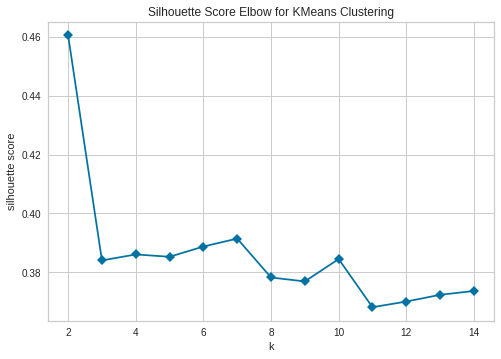

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X_train_enc)    
visualizer.poof() 

In [ ]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42).fit(X_train_enc)
#y_kmeans = kmeans.fit_predict(X_train_enc)

In [ ]:
from matplotlib.patches import Rectangle, Patch  # for creating a legend
from matplotlib.lines import Line2D

centers = np.array(kmeans.cluster_centers_)

markers = ['o', 'v', 's', '*', 'p', 'd', 'h']

labels = kmeans.labels_
labels_unique = set(labels)

colors = sns.color_palette('husl', n_colors=len(labels_unique))

cmap = dict(zip(labels_unique, colors))

Streaming output truncated to the last 5000 lines.
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



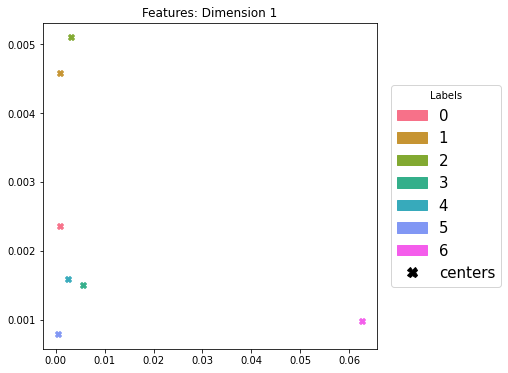

Streaming output truncated to the last 5000 lines.
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



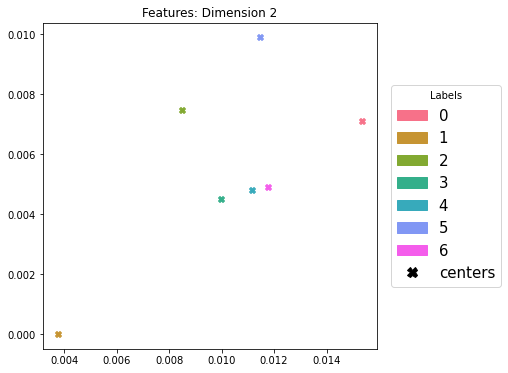

Streaming output truncated to the last 5000 lines.
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



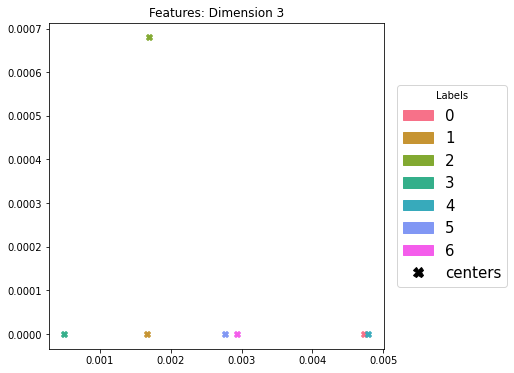

Streaming output truncated to the last 5000 lines.
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



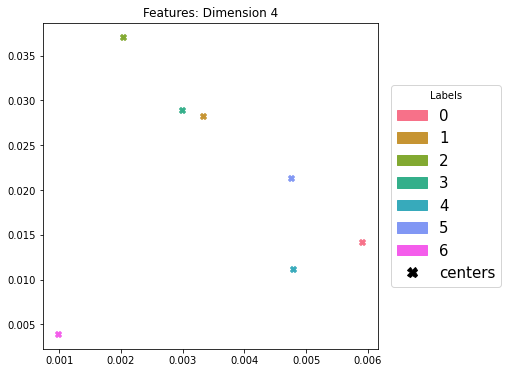

Streaming output truncated to the last 5000 lines.
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



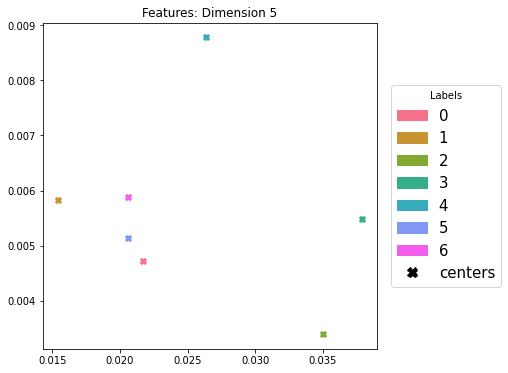

Streaming output truncated to the last 5000 lines.
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>, <1x

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



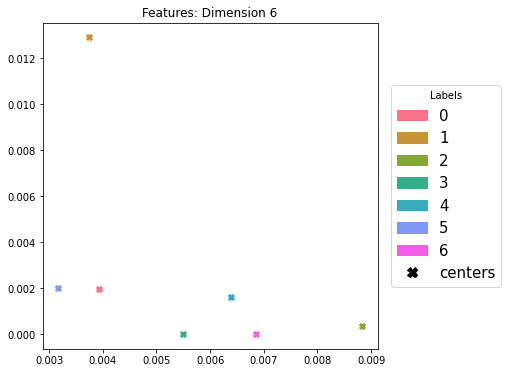

In [ ]:
for j in range(0, len(centers)*2, 2):
    plt.figure(figsize=(6, 6))
    
    x_features = X_train_enc[:, j]
    y_features = X_train_enc[:, j+1]
    x_centers = centers[:, j]
    y_centers = centers[:, j+1]

    #for i, l in enumerate(labels):
       # plt.plot(x_features[i], y_features[i], color=colors[l], marker=markers[l], alpha=0.5)

    print(f'feature labels:\n{list(labels)}')
    print(f'x_features:\n{list(map(lambda x: round(x, 3), x_features))}')
    print(f'y_features:\n{list(map(lambda x: round(x, 3), y_features))}')
    print(f'x_centers:\n{list(map(lambda x: round(x, 3), x_centers))}')
    print(f'y_centers:\n{list(map(lambda x: round(x, 3), y_centers))}')

    for k in range(len(centers)):  
        plt.scatter(x_centers[k], y_centers[k], marker="X", color=colors[k])
    
    # title
    plt.title(f'Features: Dimension {int(j/2)}')
    
    # create the rectangles for the legend
    patches = [Patch(color=v, label=k) for k, v in cmap.items()]
    # create centers marker for the legend
    black_x = Line2D([], [], color='k', marker='X', linestyle='None', label='centers', markersize=10)
    # add the legend
    plt.legend(title='Labels', handles=patches + [black_x], bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0, fontsize=15)
    
    plt.show()
      

# PCA + K Means

In [ ]:
X_train_enc= prepare_inputs(x)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
x_train = sc.fit_transform(X_train_enc)

In [ ]:
X_train_new = X_train_enc.toarray()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X_train = pca.fit_transform(X_train_new)

In [ ]:
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X_train, kmeans.labels_))

0.7071861592582945


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


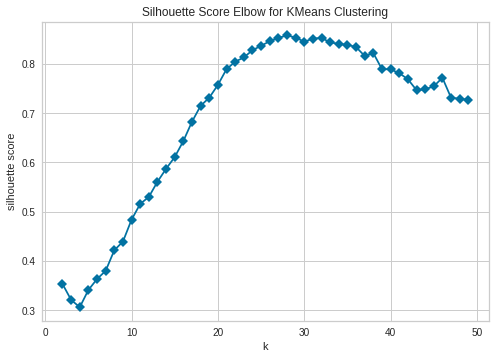

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,50), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X_train)    
visualizer.poof() 

In [ ]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42).fit(X_train)

In [ ]:
from matplotlib.patches import Rectangle, Patch  # for creating a legend
from matplotlib.lines import Line2D

centers = np.array(kmeans.cluster_centers_)

markers = ['o', 'v', 's', '*', 'p', 'd', 'h', '.']

labels = kmeans.labels_
labels_unique = set(labels)

colors = sns.color_palette('husl', n_colors=len(labels_unique))

cmap = dict(zip(labels_unique, colors))

In [ ]:
for j in range(0, len(centers)*2, 2):
      if j == 5:
        break
    
        plt.figure(figsize=(6, 6))

    
        x_features = X_train[:, j]
        y_features = X_train[:, j+1]
        x_centers = centers[:, j]
        y_centers = centers[:, j+1]

feature labels:
[0, 4, 5, 6, 4, 2, 2, 2, 2, 7, 7, 5, 7, 7, 0, 5, 2, 3, 3, 3, 3, 3, 5, 3, 3, 3, 5, 5, 4, 4, 4, 4, 4, 6, 6, 5, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 7, 2, 7, 5, 5, 0, 0, 5, 5, 0, 0, 5, 0, 6, 6, 6, 4, 4, 4, 4, 7, 2, 5, 5, 2, 2, 5, 2, 2, 2, 5, 2, 2, 5, 5, 5, 0, 5, 3, 6, 1, 1, 5, 5, 3, 5, 7, 0, 0, 0, 2, 5, 3, 3, 5, 6, 6, 6, 6, 6, 6, 0, 5, 5, 5, 5, 5, 1, 4, 3, 3, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 5, 2, 5, 2, 5, 5, 5, 2, 2, 5, 3, 3, 5, 5, 7, 0, 2, 2, 5, 2, 5, 5, 5, 2, 2, 5, 5, 0, 3, 6, 6, 2, 7, 2, 7, 2, 2, 2, 5, 3, 5, 4, 4, 7, 7, 2, 7, 2, 3, 3, 2, 7, 3, 3, 6, 3, 6, 1, 1, 1, 4, 4, 4, 4, 4, 6, 6, 0, 0, 0, 0, 2, 7, 0, 7, 5, 0, 0, 3, 3, 5, 3, 2, 3, 3, 1, 1, 1, 1, 1, 4, 4, 6, 6, 4, 6, 6, 6, 6, 1, 4, 4, 0, 5, 4, 5, 5, 5, 3, 3, 5, 3, 3, 0, 5, 6, 4, 4, 4, 4, 4, 4, 6, 6, 4, 6, 7, 7, 7, 0, 7, 7, 7, 7, 5, 2, 7, 4, 6, 6, 6, 4, 4, 4, 6, 4, 7, 2, 0, 7, 0, 2, 2, 6, 6, 6, 7, 6, 6, 4, 6, 0, 6, 7, 4, 7, 6, 7, 4, 0, 6, 0, 6, 0, 4, 0, 7, 0, 7,

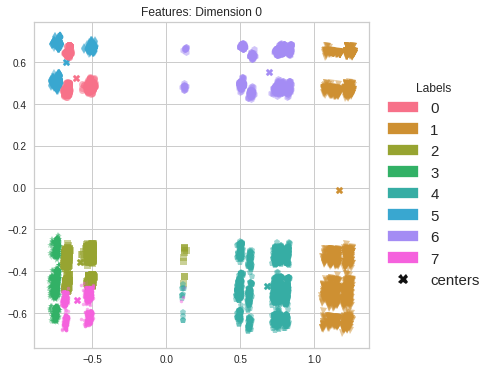

feature labels:
[0, 4, 5, 6, 4, 2, 2, 2, 2, 7, 7, 5, 7, 7, 0, 5, 2, 3, 3, 3, 3, 3, 5, 3, 3, 3, 5, 5, 4, 4, 4, 4, 4, 6, 6, 5, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 7, 2, 7, 5, 5, 0, 0, 5, 5, 0, 0, 5, 0, 6, 6, 6, 4, 4, 4, 4, 7, 2, 5, 5, 2, 2, 5, 2, 2, 2, 5, 2, 2, 5, 5, 5, 0, 5, 3, 6, 1, 1, 5, 5, 3, 5, 7, 0, 0, 0, 2, 5, 3, 3, 5, 6, 6, 6, 6, 6, 6, 0, 5, 5, 5, 5, 5, 1, 4, 3, 3, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 5, 2, 5, 2, 5, 5, 5, 2, 2, 5, 3, 3, 5, 5, 7, 0, 2, 2, 5, 2, 5, 5, 5, 2, 2, 5, 5, 0, 3, 6, 6, 2, 7, 2, 7, 2, 2, 2, 5, 3, 5, 4, 4, 7, 7, 2, 7, 2, 3, 3, 2, 7, 3, 3, 6, 3, 6, 1, 1, 1, 4, 4, 4, 4, 4, 6, 6, 0, 0, 0, 0, 2, 7, 0, 7, 5, 0, 0, 3, 3, 5, 3, 2, 3, 3, 1, 1, 1, 1, 1, 4, 4, 6, 6, 4, 6, 6, 6, 6, 1, 4, 4, 0, 5, 4, 5, 5, 5, 3, 3, 5, 3, 3, 0, 5, 6, 4, 4, 4, 4, 4, 4, 6, 6, 4, 6, 7, 7, 7, 0, 7, 7, 7, 7, 5, 2, 7, 4, 6, 6, 6, 4, 4, 4, 6, 4, 7, 2, 0, 7, 0, 2, 2, 6, 6, 6, 7, 6, 6, 4, 6, 0, 6, 7, 4, 7, 6, 7, 4, 0, 6, 0, 6, 0, 4, 0, 7, 0, 7,

feature labels:
[0, 4, 5, 6, 4, 2, 2, 2, 2, 7, 7, 5, 7, 7, 0, 5, 2, 3, 3, 3, 3, 3, 5, 3, 3, 3, 5, 5, 4, 4, 4, 4, 4, 6, 6, 5, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 7, 2, 7, 5, 5, 0, 0, 5, 5, 0, 0, 5, 0, 6, 6, 6, 4, 4, 4, 4, 7, 2, 5, 5, 2, 2, 5, 2, 2, 2, 5, 2, 2, 5, 5, 5, 0, 5, 3, 6, 1, 1, 5, 5, 3, 5, 7, 0, 0, 0, 2, 5, 3, 3, 5, 6, 6, 6, 6, 6, 6, 0, 5, 5, 5, 5, 5, 1, 4, 3, 3, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 5, 2, 5, 2, 5, 5, 5, 2, 2, 5, 3, 3, 5, 5, 7, 0, 2, 2, 5, 2, 5, 5, 5, 2, 2, 5, 5, 0, 3, 6, 6, 2, 7, 2, 7, 2, 2, 2, 5, 3, 5, 4, 4, 7, 7, 2, 7, 2, 3, 3, 2, 7, 3, 3, 6, 3, 6, 1, 1, 1, 4, 4, 4, 4, 4, 6, 6, 0, 0, 0, 0, 2, 7, 0, 7, 5, 0, 0, 3, 3, 5, 3, 2, 3, 3, 1, 1, 1, 1, 1, 4, 4, 6, 6, 4, 6, 6, 6, 6, 1, 4, 4, 0, 5, 4, 5, 5, 5, 3, 3, 5, 3, 3, 0, 5, 6, 4, 4, 4, 4, 4, 4, 6, 6, 4, 6, 7, 7, 7, 0, 7, 7, 7, 7, 5, 2, 7, 4, 6, 6, 6, 4, 4, 4, 6, 4, 7, 2, 0, 7, 0, 2, 2, 6, 6, 6, 7, 6, 6, 4, 6, 0, 6, 7, 4, 7, 6, 7, 4, 0, 6, 0, 6, 0, 4, 0, 7, 0, 7,

In [ ]:
for j in range(0, len(centers)*2, 2):
  if j==6:
    break

  else:
    plt.figure(figsize=(6, 6))
    
    x_features = X_train[:, j]
    y_features = X_train[:, j+1]
    x_centers = centers[:, j]
    y_centers = centers[:, j+1]

    for i, l in enumerate(labels):
        plt.plot(x_features[i], y_features[i], color=colors[l], marker=markers[l], alpha=0.5)

    print(f'feature labels:\n{list(labels)}')
    print(f'x_features:\n{list(map(lambda x: round(x, 3), x_features))}')
    print(f'y_features:\n{list(map(lambda x: round(x, 3), y_features))}')
    print(f'x_centers:\n{list(map(lambda x: round(x, 3), x_centers))}')
    print(f'y_centers:\n{list(map(lambda x: round(x, 3), y_centers))}')

    for k in range(len(centers)):  
        plt.scatter(x_centers[k], y_centers[k], marker="X", color=colors[k])
    
    # title
    plt.title(f'Features: Dimension {int(j/2)}')
    
    # create the rectangles for the legend
    patches = [Patch(color=v, label=k) for k, v in cmap.items()]
    # create centers marker for the legend
    black_x = Line2D([], [], color='k', marker='X', linestyle='None', label='centers', markersize=10)
    # add the legend
    plt.legend(title='Labels', handles=patches + [black_x], bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0, fontsize=15)
    
    plt.show()

# SVD + K Means (Terrible Results)

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

In [ ]:
X = csr_matrix(X_train_enc)

In [ ]:
svd = TruncatedSVD(n_components= 6, n_iter=7, random_state=42)
svd.fit(X)
svd.fit_transform(X)

array([[ 1.04579945, -0.40965077, -0.55341742, -0.39746263, -0.1060932 ,
        -0.23216551],
       [ 0.37305208,  0.76350163, -0.02685866,  0.13567137,  0.26790378,
         0.69839694],
       [ 1.50043269, -0.3352356 ,  0.14140028, -0.30737629, -0.66485897,
        -0.32931351],
       ...,
       [ 0.54095181,  1.14832924,  0.05805531,  0.15888637,  0.79185781,
        -0.35050062],
       [ 0.98814979,  1.26765104, -0.57012486, -0.2614822 ,  0.28765894,
        -0.46895337],
       [ 1.39852857,  1.36931041,  0.12091698, -0.14790253, -0.29410083,
        -0.52519714]])

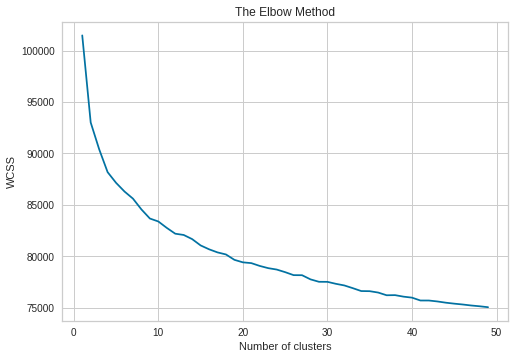

In [ ]:
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.03716009035734237


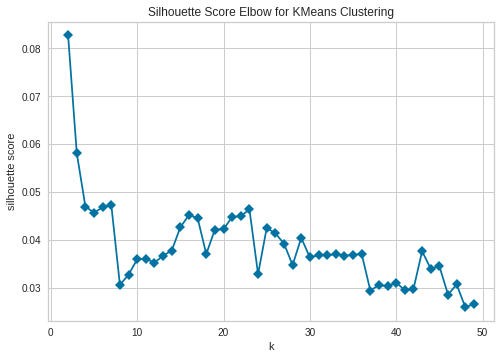

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,50), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof() 

# DBSCAN (Unable to go beyond one cluster no matter how much I tweak both the Epislon and min_samples(Z)

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps =5, min_samples = 5).fit(X_train)
cluster = clustering.labels_

In [ ]:
len(set(cluster))

1